# Opis dát a preprocessing

Oficiálny opis a zdroj datasetu: https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq

### Time Occurred

> In 24 hour military time.

Teda v tvare *hhmm*. Tento atribút sme transformovali diskretizáciou na časové vedrá vyššieho konceptu nasledovne:

| Vedro         | Interval      |
| ------------- |:-------------:|
| night         | <2100, 500)   |
| morning       | <500, 1200)   |
| afternoon     | <1200, 1700)  |
| evening       | <1700, 2100)  |


### Crime Code

> Indicates the crime committed. 
> Crime Code 1 is the primary and most serious one. 
> Crime Code 2, 3, and 4 are respectively less serious offenses.
> Lower crime class numbers are more serious.

Crime code je rovnaky ako Crime code 1

Crime code 2-4 nie je vsade vyplneny, preto ho dropujeme

   => Preto sa zameriame na serious offenses, teda Crime Code
   
### Zone Id

> The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

Zone ID su geograficke zony dvadsiatychjednych Community Police Stations

### Premise Code/Description

> The type of structure, vehicle, or location where the crime took place.

### Victim Sex

> F - Female M - Male X - Unknown

### MO Codes

> Modus Operandi: Activities associated with the suspect in commission of the crime. See attached PDF for list of MO Codes in numerical order. 

> https://data.lacity.org/api/views/y8tr-7khq/files/3a967fbd-f210-4857-bc52-60230efe256c?download=true&filename=MO%20CODES%20(numerical%20order).pdf

### Descent Code: 

> - A - Other Asian 
- B - Black 
- C - Chinese 
- D - Cambodian
- F - Filipino
- G - Guamanian
- H - Hispanic/Latin/Mexican
- I - American Indian/Alaskan Native
- J - Japanese
- K - Korean
- L - Laotian
- O - Other
- P - PacificIslander
- S - Samoan
- U - Hawaiian
- V - Vietnamese
- W - White
- X - Unknown
- Z - Asian Indian

### Location

> The location where the crime incident occurred.
> Actual address is omitted for confidentiality. 
> XY coordinates reflect the nearest 100 block.

Location je kategorický atribút v tvare *(x, y)*.

### Address a Cross Street

>Address fields are only provided to the nearest hundred block in order to maintain privacy.

> Cross Street of rounded Address.

### Weapon Description/Weapon Used Code

> The type of weapon used in the crime. 

Tento atribút môžeme teoreticky použiť ako vlastnosť, ktorá hovorí o tom, či pri čine bola použitá zbraň,
alebo nie. Respektíve, môže hovoriť o tom, či bol čin násilný, alebo nie.


### Good info

- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms
- http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#nearest-neighbor-and-the-curse-of-dimensionality
- https://medium.com/@agarwalvibhor84/getting-started-with-machine-learning-using-sklearn-python-7d165618eddf
- http://efavdb.com/predicting-san-francisco-crimes/
- https://www.kaggle.com/jsmwoolf/los-angeles-crime-analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data//Crime_Data_2010_2017.csv')

In [3]:
data.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"


In [4]:
columns_to_drop = ['Area ID', 'Premise Code', 'Reporting District', 'Crime Code', 'MO Codes', 'Weapon Used Code', 'Weapon Description', 'Status Code', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street']
df_coldrop = data.drop(columns_to_drop, axis=1)
df_coldrop.head(2)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,Olympic,VEHICLE - STOLEN,NaN,NaN,NaN,STREET,Invest Cont,510.0,VAN NESS,"(34.0454, -118.3157)"


In [5]:
# pocet bez NaN
# pandas pri slicingu robi iba VIEWS
# preto treba vytvorit novy DF pomocou copy()
df_victims_only = df_coldrop.dropna().copy()
len(df_victims_only)

1327814

In [6]:
len(df_victims_only['Premise Description'].unique())
# date occured - je to casvovy sled mozme usporiadat
# podobne prace, sklearn, podobne ulohy, kaggle
# bar plot - histogram = po dummy_variables, pozri, ktore sltpce maju malu pocetnost, vyhodit je
# location - pozriet rozdiely, min, max, dev?

210

In [7]:
# pocet s NaN
len(df_coldrop)


1584316

In [8]:
print(len(df_victims_only['Location '].unique()))
# 58989 unikatnych GPS suradnic
print(len(df_victims_only['Address'].unique()))
# 68282 unikatnych Adries
print(len(df_victims_only['Area Name'].unique()))
# 21 unikatnych Area name

58989
68282
21


In [9]:
# def strip0(string):
#     l = string.split(',').replace('')
#     return (l[0], l[1])
import re

def coords_f(coord):
    matchObj = re.match(r'\((.*), (.*)\)', coord)
    return (matchObj.group(1), matchObj.group(2))
coords_tuples = list(map(coords_f, df_victims_only['Location '].unique()))
#coords_tuples
# min(coords_tuples, key = lambda x: x[0])


In [10]:
#list(df_victims_only['Time Occurred'].unique()


In [11]:
df_victims_only['Time Occurred'].head(10)

0     1800
4     2300
5     1400
9      800
12    1200
13    1200
14    2030
15     500
16    1420
17    1430
Name: Time Occurred, dtype: int64

In [12]:
# cas sme rozbinovali na kategoricke premenne podla intervalov:
# (2100, 500> night
# (500, 1200> morning
# (1200, 1700> afternoon
# (1700, 2100> evening
pd.cut(df_victims_only['Time Occurred'], [0, 500, 1200, 1700, 2100, 2400], labels=['night', 'morning', 'afternoon', 'evening', 'night2']).replace('night2', 'night').head()

0       evening
4         night
5     afternoon
9       morning
12      morning
Name: Time Occurred, dtype: category
Categories (5, object): [night < morning < afternoon < evening < night2]

In [13]:
pd.get_dummies(df_victims_only, columns=['Area Name', 'Crime Code Description', 'Premise Description', 'Victim Sex', 'Victim Descent'], drop_first=True).head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Victim Age,Status Description,Crime Code 1,Address,Location,Area Name_Central,...,Victim Descent_K,Victim Descent_L,Victim Descent_O,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z
0,1208575,03/14/2013,03/11/2013,1800,30.0,Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)",0,...,0,0,0,0,0,0,0,1,0,0
4,42104479,01/11/2014,01/04/2014,2300,84.0,Invest Cont,745.0,7200 CIRRUS WY,"(34.2009, -118.6369)",0,...,0,0,0,0,0,0,0,1,0,0
5,120125367,01/08/2013,01/08/2013,1400,49.0,Adult Arrest,110.0,600 N HILL ST,"(34.0591, -118.2412)",1,...,0,0,0,0,0,0,0,1,0,0
9,120908292,03/29/2013,01/15/2013,800,27.0,Invest Cont,668.0,7200 SEPULVEDA BL,"(34.2012, -118.4662)",0,...,0,0,1,0,0,0,0,0,0,0
12,121207315,02/22/2013,02/13/2013,1200,42.0,Invest Cont,440.0,82ND,"(33.9651, -118.2783)",0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Victim age z float do int
a = df_victims_only["Victim Age"].astype(int).copy()
df_victims_only["Victim Age"] = a

In [15]:
df_victims_only.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area Name,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Description,Crime Code 1,Address,Location
0,1208575,03/14/2013,03/11/2013,1800,77th Street,INTIMATE PARTNER - SIMPLE ASSAULT,30,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,626.0,6300 BRYNHURST AV,"(33.9829, -118.3338)"
4,42104479,01/11/2014,01/04/2014,2300,Topanga,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84,M,W,SINGLE FAMILY DWELLING,Invest Cont,745.0,7200 CIRRUS WY,"(34.2009, -118.6369)"
5,120125367,01/08/2013,01/08/2013,1400,Central,CRIMINAL HOMICIDE,49,F,W,SINGLE FAMILY DWELLING,Adult Arrest,110.0,600 N HILL ST,"(34.0591, -118.2412)"
9,120908292,03/29/2013,01/15/2013,800,Van Nuys,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27,F,O,OTHER BUSINESS,Invest Cont,668.0,7200 SEPULVEDA BL,"(34.2012, -118.4662)"
12,121207315,02/22/2013,02/13/2013,1200,77th Street,THEFT PLAIN - PETTY ($950 & UNDER),42,M,H,PARKING LOT,Invest Cont,440.0,82ND,"(33.9651, -118.2783)"


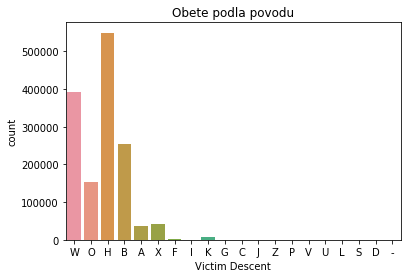

In [16]:
sns.countplot('Victim Descent', data=data).set_title('Obete podla povodu')

In [17]:
descent_without_whb = list(df_victims_only['Victim Descent'].unique())
descent_without_whb = filter(lambda x: x != 'W', descent_without_whb)
descent_without_whb = filter(lambda x: x != 'H', descent_without_whb)
descent_without_whb = filter(lambda x: x != 'B', descent_without_whb)
descent_without_whb = {x[0]:'O' for x in descent_without_whb }

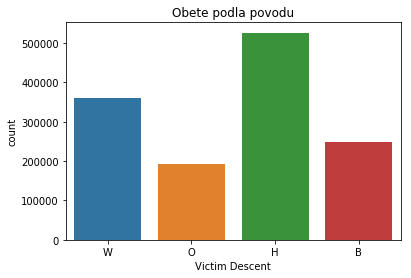

In [18]:
# Spojime O povod s ostatnymi
df_descent_merge = df_victims_only.copy()
df_descent_merge['Victim Descent'] = df_victims_only['Victim Descent'].replace(descent_without_whb)
df_descent_merge['Victim Descent'].unique()
sns.countplot('Victim Descent', data=df_descent_merge).set_title('Obete podla povodu')


In [19]:
features = df_descent_merge[['Area Name', 'Crime Code Description', 'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Description']].head(10000)

label = 'Victim Age'
feature_columns = list(features.columns)
feature_columns.remove(label)
print(feature_columns)


['Area Name', 'Crime Code Description', 'Victim Sex', 'Victim Descent', 'Premise Description']


NameError: name 'featurs' is not defined

In [21]:
encoded = pd.get_dummies(features, columns=feature_columns)

In [22]:
featurs = encoded
labels = features[label]

In [23]:
# http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

In [24]:
X_train, X_test, y_train, y_test = train_test_split(featurs, labels, test_size=0.4, random_state=0)

In [25]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
clf.score(X_test, y_test)

0.64349999999999996

In [28]:
labels

0        30
4        84
5        49
9        27
12       42
13       29
14       12
15       19
16       23
17       39
18       18
19       25
20       34
21       37
22       50
23       20
24       32
25       18
27       30
28       24
29       48
30       18
31       27
32       24
33       45
34       50
35       60
37       45
38       40
41       23
         ..
12053    26
12054    20
12055    82
12056    50
12057    12
12058    12
12059    12
12060    20
12061    74
12062    41
12063    20
12064    49
12065    28
12067    21
12068    33
12069    23
12070    48
12071    12
12072    39
12073    44
12074    30
12075    52
12077    19
12078    19
12079    56
12080    53
12081    31
12082    44
12083    54
12085    49
Name: Victim Age, Length: 10000, dtype: int32

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, featurs, labels, cv=5)

C:\Users\enderstorm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [56]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.02)


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(featurs)
X_pca = pca.transform(featurs)
print("original shape:   ", featurs.shape)
print("transformed shape:", X_pca.shape)
X_pca

original shape:    (10000, 259)
transformed shape: (10000, 200)


array([[ -7.49929504e+00,   7.83433011e-01,  -5.76866535e-01, ...,
          6.80684881e-04,   2.25986858e-04,   4.51777394e-04],
       [  4.65041508e+01,  -2.43054835e-02,   6.11788605e-01, ...,
          1.07794874e-03,   1.46177166e-03,   7.57936943e-03],
       [  1.15053219e+01,   3.11988672e-01,  -9.41531435e-01, ...,
          7.26065441e-04,  -6.96613440e-04,  -4.34575372e-04],
       ..., 
       [  6.48986720e+00,   1.33744034e+00,   3.08740270e-01, ...,
          7.36223678e-04,   4.92085380e-04,  -1.16662340e-03],
       [  1.64927593e+01,   4.24718933e-01,   1.35561598e+00, ...,
         -9.59756638e-05,  -1.83355092e-04,  -1.41451619e-04],
       [  1.14966123e+01,   1.26670276e+00,  -1.47314537e-02, ...,
          1.49001686e-04,  -5.48413640e-04,  -4.57467044e-04]])

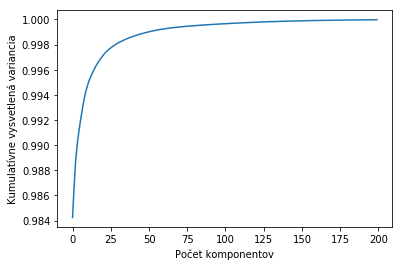

In [58]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Počet komponentov')
plt.ylabel('Kumulatívne vysvetlená variancia');



In [48]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, svd_solver='randomized')
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

In [49]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

C:\Users\enderstorm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\enderstorm\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\enderstorm\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds))

Wall time: 4min 3s
{'svc__C': 50, 'svc__gamma': 0.0005}


In [54]:
scores2 = cross_val_score(model, featurs, labels, cv=2)

C:\Users\enderstorm\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


In [51]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Accuracy: 1.00 (+/- 0.01)
